# Q1. Delivery_time -> Predict delivery time using sorting time 

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
DT = pd.read_csv("D:\Assignment\Assingments\Simple Linear Regression\delivery_time.csv")
DT.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA


In [3]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


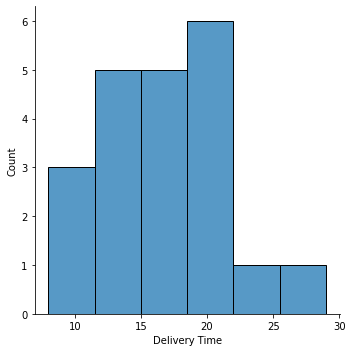

In [4]:
sns.displot(DT['Delivery Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

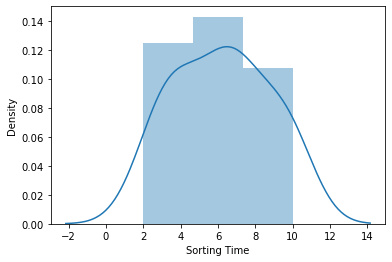

In [5]:
sns.distplot(DT['Sorting Time'])

# Correlation

In [6]:
DT.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


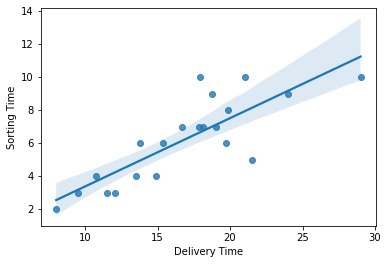

In [7]:
sns.regplot(x="Delivery Time", y="Sorting Time", data=DT);

In [8]:
#Rename Columns
DT=DT.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
DT

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model Building

In [9]:
model=smf.ols("delivery_time~sorting_time",data=DT).fit()
print(model)

#Coefficient parameters
print(model.params)

#tvalue and pvalue
print(model.tvalues, '\n' , model.pvalues)

#R squared values
(model.rsquared,model.rsquared_adj)

Intercept       6.582734
sorting_time    1.649020
dtype: float64
Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [10]:
# Manual prediction for say sorting time 4
delivery_time = (6.582734) + (1.649020)*(4)
print(delivery_time)

13.178814


In [11]:
# Automatic Prediction for say sorting time 4, 8
new_data=pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [12]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,4
1,8


In [13]:
model.predict(data_pred)

0    13.178814
1    19.774893
dtype: float64

In [14]:
#Train Data set

In [15]:
X = DT.iloc[:,0:1].values
y = DT.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split  


In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25)

In [18]:
print(len(X_train))
print(len(y_train))
print(len(X_test))

15
15
6


In [19]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [20]:
clf.fit(X_train,y_train)

LinearRegression()

In [21]:
clf.predict(X_test)

array([6.8419727 , 5.90972167, 3.52685587, 7.17549355, 5.18642345,
       6.39995713])

In [22]:
y_test

array([ 7,  7,  4,  8,  4, 10], dtype=int64)

In [23]:
clf.score(X_test,y_test)

0.3968805481811374

#  Using Log Normal

In [24]:
x_log=np.log(DT['sorting_time'])
y_log=np.log(DT['delivery_time'])

In [25]:
# Model Building
model =smf.ols("y_log~ x_log",data = DT).fit()
print(model)

#Coefficient parameters
print(model.params)

#tvalue and pvalue
print(model.tvalues, '\n' , model.pvalues)

#R squared values
(model.rsquared,model.rsquared_adj)

Intercept    1.741987
x_log        0.597522
dtype: float64
Intercept    13.085552
x_log         8.024484
dtype: float64 
 Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64


(0.77216134926874, 0.7601698413355158)

In [26]:
y_log=(1.741987) + (0.597522)*4
print(y_log)

4.132075


In [27]:
# Automatic Prediction for say sorting time 4, 8
new_data=pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['x_log'])
data_pred

,x_log
0,4
1,8


In [29]:
model.predict(data_pred)

0    4.132076
1    6.522166
dtype: float64

#  Using SQRT

In [30]:
x_sqrt=np.sqrt(DT['sorting_time'])
y_sqrt=np.sqrt(DT['delivery_time'])

In [31]:
# Model Building
model =smf.ols("y_sqrt~ x_sqrt",data = DT).fit()
print(model)

#Coefficient parameters
print(model.params)

#tvalue and pvalue
print(model.tvalues, '\n' , model.pvalues)

#R squared values
(model.rsquared,model.rsquared_adj)

Intercept    1.613479
x_sqrt       1.002217
dtype: float64
Intercept    4.628248
x_sqrt       7.152817
dtype: float64 
 Intercept    1.833621e-04
x_sqrt       8.475706e-07
dtype: float64


(0.7292011987544664, 0.7149486302678594)

In [32]:
y_sqrt=(1.613479) + (1.002217)*4
print(y_sqrt)

5.6223469999999995


In [33]:
# Automatic Prediction for say sorting time 4, 8
new_data=pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [34]:
data_pred=pd.DataFrame(new_data,columns=['x_sqrt'])
data_pred

,x_sqrt
0,4
1,8


In [35]:
model.predict(data_pred)

0    5.622346
1    9.631214
dtype: float64

# Q2.Salary_hike -> Build a prediction model for Salary_hike


In [36]:
yes = pd.read_csv("D:\Assignment\Assingments\Simple Linear Regression\Salary_Data.csv")
yes

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [37]:
yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

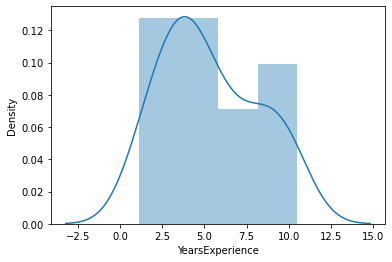

In [38]:
sns.distplot(yes['YearsExperience'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

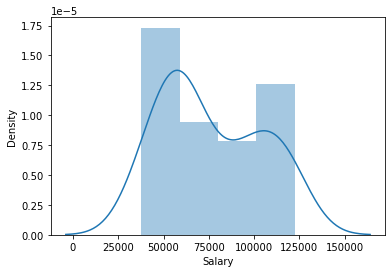

In [39]:
sns.distplot(yes['Salary'])

# Correlation

In [40]:
yes.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

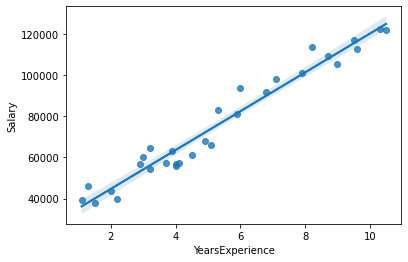

In [41]:
sns.regplot(x=yes['YearsExperience'],y=yes['Salary'])

# Model Building

In [42]:
model=smf.ols("Salary~YearsExperience",data=yes).fit()

In [43]:
# Finding Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.14e-20
Time:                        11:41:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Prediction

In [45]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [46]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [47]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [48]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [49]:
#Trian Data Set

In [50]:
X = yes.iloc[:,0:1].values
y = yes.iloc[:,1].values

In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25)

In [52]:
from sklearn.linear_model import LinearRegression
clf2 = LinearRegression()

In [53]:
clf2.fit(X_train,y_train)

LinearRegression()

In [54]:
clf2.predict(X_test)

array([117664.2274073 ,  64239.77562727, 101446.09025979,  56607.71108726,
        64239.77562727,  69009.81596477,  63285.76755977, 124342.2838798 ])

In [55]:
y_test

array([112635.,  55794., 101302.,  64445.,  56957.,  61111.,  63218.,
       122391.])

In [56]:
clf2.score(X_test,y_test)

0.9478007747155076

In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': clf2.predict(X_test)})
df

,Actual,Predicted
0,112635.0,117664.227407
1,55794.0,64239.775627
2,101302.0,101446.090260
3,64445.0,56607.711087
4,56957.0,64239.775627
5,61111.0,69009.815965
6,63218.0,63285.767560
7,122391.0,124342.283880


# Using Log Normal 

In [58]:
x_log=np.log(yes['YearsExperience'])
y_log=np.log(yes['Salary'])

In [59]:
# Model Building
model =smf.ols("y_log~ x_log",data = yes).fit()
print(model)

#Coefficient parameters
print(model.params)

#tvalue and pvalue
print(model.tvalues, '\n' , model.pvalues)

#R squared values
(model.rsquared,model.rsquared_adj)

Intercept    10.328043
x_log         0.562089
dtype: float64
Intercept    184.867959
x_log         16.352542
dtype: float64 
 Intercept    9.073132e-45
x_log        7.395278e-16
dtype: float64


(0.905215072581715, 0.9018298966024905)

In [60]:
y_log=(10.328043) + (0.562089)*4
print(y_log)

12.576398999999999


In [61]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [62]:
data_pred=pd.DataFrame(new_data,columns=['x_log'])
data_pred

,x_log
0,3
1,5


In [63]:
model.predict(data_pred)

0    12.014310
1    13.138487
dtype: float64

#  Using SQRT

In [64]:
x_sqrt=np.sqrt(yes['YearsExperience'])
y_sqrt=np.sqrt(yes['Salary'])

In [65]:
# Model Building
model =smf.ols("y_sqrt~ x_sqrt",data = yes).fit()
print(model)

#Coefficient parameters
print(model.params)

#tvalue and pvalue
print(model.tvalues, '\n' , model.pvalues)

#R squared values
(model.rsquared,model.rsquared_adj)

Intercept    103.568031
x_sqrt        75.626932
dtype: float64
Intercept    12.663496
x_sqrt       21.315126
dtype: float64 
 Intercept    4.141645e-13
x_sqrt       7.584326e-19
dtype: float64


(0.9419490138976826, 0.9398757643940284)

In [66]:
y_sqrt=(103.568031) + (75.626932)*4
print(y_sqrt)

406.075759


In [67]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [68]:
data_pred=pd.DataFrame(new_data,columns=['x_sqrt'])
data_pred

,x_sqrt
0,3
1,5


In [69]:
model.predict(data_pred)

0    330.448826
1    481.702690
dtype: float64